In [89]:
# imprort all libraries and modules
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score

In [90]:
data = pd.read_csv('../train.csv') # data on which all research and improvement will be done on
test_data = pd.read_csv('../test.csv') # used for predictions at the end of notebook

# Dimensionality of the dataset

In [91]:
print(f'Dataset shape -> {data.shape}') # printing the shape
print('\nNumber of distinct elements:') 
print(data.nunique()) # printing number of unique values for each feature

Dataset shape -> (501400, 10)

Number of distinct elements:
Date           2507
Symbol          200
Adj Close    403428
Close         81886
High          81035
Low           80693
Open          80449
Volume       163874
Target            2
Id           501400
dtype: int64


Here we can see that the dataset consists of 501400 samples and 10 features. Dataset consists of following features:

* Date - Datetime
* Symbol - Stock name
* Adj Close - Adjusted close stock price
* Close - Stock price on closing time
* High - Highest stock price on given day
* Low -Lowest stock price on given day
* Open - Stock price on market opening
* Volume - Trading volume
* Target - Targeted value. If for a given stock there will be at least 2% increase in next 2 months.
* Id - Id

In [105]:
n = data['Symbol'].nunique() # get number of unique stocks
print(f'Number of unique stocks: {n}\n')

unique_symbols = data['Symbol'].unique() # get list of unique stocks
stocks_grouped_by_twenty = [unique_symbols[i:i + 20] for i in range(0, n, 20)]  # group stocks in groups of twenty
for s in stocks_grouped_by_twenty:
    print('\t'.join(s))

Number of unique stocks: 200

MMM	AOS	ACN	AES	A	AKAM	ALB	ALLE	LNT	GOOGL	MO	AMZN	AXP	AWK	AME	ANSS	APA	AAPL	AMAT	ADM
ANET	AIZ	T	BKR	BALL	BAC	BBY	BIIB	BLK	BMY	AVGO	BG	CPB	CAH	CBOE	CHRW	CHTR	CMG	CINF	CSCO
CFG	CME	CMS	KO	CAG	ED	STZ	CTVA	CTRA	CMI	DVA	DE	XRAY	FANG	DLR	DFS	DPZ	DHI	DTE	DUK
EBAY	EMR	ENPH	EOG	EQIX	ESS	EL	EVRG	ES	EXPD	EXR	FFIV	FAST	FIS	FE	FLT	FTV	FOXA	FCX	IT
GEHC	GEN	GNRC	GM	GPC	GL	GS	HAS	PEAK	HSY	HES	HLT	HST	HBAN	IBM	ILMN	PODD	INTC	IFF	IP
ISRG	IVZ	INVH	IQV	JNJ	KVUE	KDP	KEY	KEYS	KMB	KIM	KMI	KR	LVS	LDOS	LIN	LMT	LYB	MPC	MKTX
MMC	MCD	MAA	MHK	TAP	MPWR	MS	MOS	MSI	NDAQ	NEE	NDSN	NOC	NRG	NVDA	NVR	ORCL	PKG	PARA	PH
PAYX	PNR	PCG	PSX	PNW	PNC	PGR	PRU	PTC	PSA	PHM	PWR	QCOM	DGX	RL	RF	RSG	RMD	RVTY	RHI
ROL	ROST	SRE	SPG	SWKS	SO	STLD	SYF	TRGP	TGT	TEL	TDY	TXN	TMO	TJX	TSCO	TRMB	TFC	ULTA	UAL
VLO	VTR	VLTO	VRSK	VZ	VRTX	V	WRB	WAB	WBA	WMT	DIS	WM	WAT	WEC	WFC	GWW	XEL	YUM	ZTS


In the code above are printed all of the unique stocks that are contained in the dataset. By printing the number of distinct values we know there are 200 different stocks.

# Missing values

In [106]:
print('Number of missing values:')
print(data.isna().sum()) # print the number of missing values for each feature

Number of missing values:
Date             0
Symbol           0
Adj Close    27229
Close        27229
High         27229
Low          27229
Open         27229
Volume       27245
Target           0
Id               0
dtype: int64


We can see that the number of missing values is substantial, aka there are around 27229 missing values for six of the features. All of the features that contain missing values are numerical.
There are two main ways to fix missing values:
* ignoring all instances that contain a missing value
* replacing the missing value with another one

In general it is not recommended to remove all of the missing values because it is possible to lose too much of the data. In the cells below we will analyse missing values to figure out what to do with them.

In [110]:
def group_by_missing(data_to_group):
    grouped_data = data_to_group.groupby('Symbol').apply(lambda x: x.isnull().sum()) # group data by 'Symbol' and sum all missing values
    grouped_data = grouped_data.drop(columns=['Symbol']) # drop 'Symbol' column beacuse it's redundant
    grouped_data = grouped_data[~(grouped_data == 0).all(axis=1)] # remove all rows where all values are zero

    grouped_data['total_missing'] = grouped_data.sum(axis=1) # add column that counts how many missing values are for each group
    grouped_data_sorted = grouped_data.sort_values(by='total_missing', ascending=False) # sorts missing values in descending order
    grouped_data_sorted = grouped_data_sorted.drop(columns=['total_missing']) # drops 'total_missing' because it was onyl needed for sorting

    print(grouped_data_sorted)
    return grouped_data_sorted

In [108]:
grouped_data = group_by_missing(data)

        Date  Symbol  Adj Close  Close  High   Low  Open  Volume  Target  Id
Symbol                                                                      
VLTO       0       0       2507   2507  2507  2507  2507    2507       0   0
KVUE       0       0       2507   2507  2507  2507  2507    2507       0   0
GEHC       0       0       2507   2507  2507  2507  2507    2507       0   0
CTVA       0       0       2354   2354  2354  2354  2354    2354       0   0
FOXA       0       0       2302   2302  2302  2302  2302    2302       0   0
INVH       0       0       1773   1773  1773  1773  1773    1773       0   0
FTV        0       0       1627   1627  1627  1627  1627    1627       0   0
KEYS       0       0       1207   1207  1207  1207  1207    1207       0   0
CFG        0       0       1189   1189  1189  1189  1189    1189       0   0
SYF        0       0       1151   1151  1151  1151  1151    1151       0   0
ANET       0       0       1113   1113  1113  1113  1113    1113       0   0

In [111]:
grouped_data['total_rows'] = data.groupby('Symbol').size() # count number of samples for each stock
print(grouped_data['total_rows'])

Symbol
VLTO    2507
KVUE    2507
GEHC    2507
CTVA    2507
FOXA    2507
INVH    2507
FTV     2507
KEYS    2507
CFG     2507
SYF     2507
ANET    2507
HLT     2507
ALLE    2507
IQV     2507
ZTS     2507
FANG    2507
PSX     2507
ENPH    2507
MPC     2507
KMI     2507
FLT     2507
TRGP    2507
GM      2507
CBOE    2507
LYB     2507
GNRC    2507
MMM     2507
CHTR    2507
Name: total_rows, dtype: int64


We see that each stock has 2507 samples. We also see that stocks 'VLTO', 'KVUE' and 'GEHC' have 2507 missing values so it makes no sense to replace these values. Stocks 'CTVA' and 'FOXA' also have too many missing values. It is the best to simply remove those five stocks. By doing so we will not lose too much valuable information. We will only lose 2.5% of the data.

In [112]:
data = data[~data['Symbol'].isin(['VLTO', 'KVUE', 'GEHC', 'CTVA', 'FOXA'])] # remove first five stocks with most missing values
grouped_data = group_by_missing(data)

        Date  Adj Close  Close  High   Low  Open  Volume  Target  Id
Symbol                                                              
INVH       0       1773   1773  1773  1773  1773    1773       0   0
FTV        0       1627   1627  1627  1627  1627    1627       0   0
KEYS       0       1207   1207  1207  1207  1207    1207       0   0
CFG        0       1189   1189  1189  1189  1189    1189       0   0
SYF        0       1151   1151  1151  1151  1151    1151       0   0
ANET       0       1113   1113  1113  1113  1113    1113       0   0
HLT        0        993    993   993   993   993     993       0   0
ALLE       0        976    976   976   976   976     976       0   0
IQV        0        842    842   842   842   842     842       0   0
ZTS        0        775    775   775   775   775     775       0   0
FANG       0        701    701   701   701   701     701       0   0
PSX        0        573    573   573   573   573     573       0   0
ENPH       0        565    565   5

Now we will plot a heatmap of missing values for stock with the biggest amount of missing values which is 'INVH' stock.

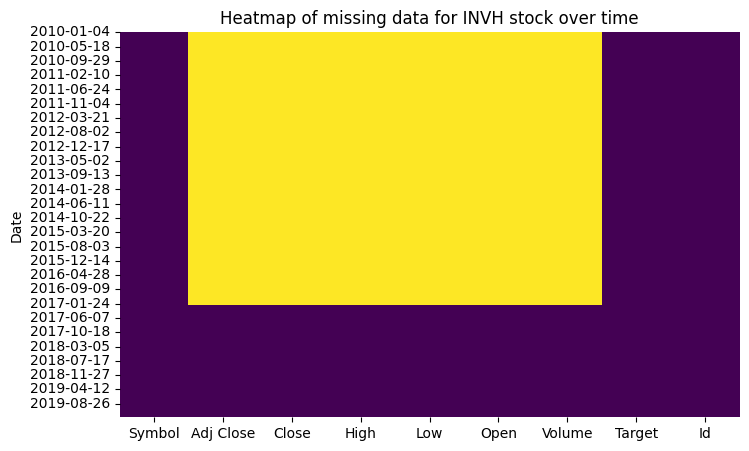

In [113]:
data_invh = data[data['Symbol'] == 'INVH'].copy() # extract only 'INVH' stock
data_invh['Date'] = pd.to_datetime(data_invh['Date']).dt.date # convert 'Date' value to date
data_invh.set_index('Date', inplace=True)

plt.figure(figsize=(8, 5)) 
sns.heatmap(data_invh.isnull(), cbar=False, cmap='viridis', yticklabels='auto') # plot heatmap of missing values
plt.yticks(rotation=0) 

plt.title('Heatmap of missing data for INVH stock over time')
plt.show()

Looking at this heatmap we can see that all of the missing values for INVH stock are samples recorded before year 2017. It makes no sense to interpolate data that doesn't exist so we will simply remove all of the samples that date before 2017. 
We will also check if any other stocks have missing values beafore certain point in time. 


In [116]:
def find_missing_value_intervals(stock):
    missing_intervals = []
    current_interval_start = None
    current_interval_end = None

    for index, row in stock.iterrows():
        if pd.isnull(row).any(): # check if any values in the current row are missing
            current_interval_end = row['Date']
            if current_interval_start is None:
                current_interval_start = row['Date']
        else:
            if current_interval_start is not None:
                missing_intervals.append((current_interval_start, current_interval_end))
                return missing_intervals

    return missing_intervals

In [117]:
data['Date'] = pd.to_datetime(data['Date']).dt.date
grouped = data.groupby('Symbol') # group data by 'Symbol'
symbols = grouped_data.index.tolist() # get names of stock that have missing values

missing_value_intervals = {}
for name, group in grouped:
    if name in symbols: # only if name of group is in list of stocks that have missing values
        missing_value_intervals[name] = find_missing_value_intervals(group)

sorted_missing_values = sorted(missing_value_intervals.items(), key=lambda x:x[1]) # sort intervals
for stock, intervals in sorted_missing_values:
    print(f"Missing value intervals for stock {stock}: ", end="")
    interval_strings = []
    for interval in intervals:
        start_date = interval[0].strftime('%d.%m.%Y') 
        end_date = interval[1].strftime('%d.%m.%Y')  
        interval_strings.append(f"{start_date} - {end_date}")
    print(", ".join(interval_strings))

Missing value intervals for stock CHTR: 04.01.2010 - 04.01.2010
Missing value intervals for stock GNRC: 04.01.2010 - 10.02.2010
Missing value intervals for stock LYB: 04.01.2010 - 27.04.2010
Missing value intervals for stock CBOE: 04.01.2010 - 14.06.2010
Missing value intervals for stock GM: 04.01.2010 - 17.11.2010
Missing value intervals for stock TRGP: 04.01.2010 - 06.12.2010
Missing value intervals for stock FLT: 04.01.2010 - 14.12.2010
Missing value intervals for stock KMI: 04.01.2010 - 10.02.2011
Missing value intervals for stock MPC: 04.01.2010 - 23.06.2011
Missing value intervals for stock ENPH: 04.01.2010 - 29.03.2012
Missing value intervals for stock PSX: 04.01.2010 - 11.04.2012
Missing value intervals for stock FANG: 04.01.2010 - 11.10.2012
Missing value intervals for stock ZTS: 04.01.2010 - 31.01.2013
Missing value intervals for stock IQV: 04.01.2010 - 08.05.2013
Missing value intervals for stock ALLE: 04.01.2010 - 15.11.2013
Missing value intervals for stock HLT: 04.01.2010

Here we can see that all these stocks, except stock 'MMM', have missing values from 4.1.2010. to a certain point in time. Seeing this we can conclude that data for these stocks wasn't recorded from 4.1.2010. but from other date. With this in mind we can simply remove all those samples with missing values.

In [118]:
for stock, intervals in sorted_missing_values:
    if stock != 'MMM': # remove all stocks except 'MMM'
        for interval in intervals:
            start_date, end_date = interval
            rows_to_remove = data[(data['Symbol'] == stock) & (data['Date'] >= start_date) & (data['Date'] <= end_date)]
            data.drop(rows_to_remove.index, inplace=True)

In [15]:
grouped_data = group_by_missing(data)

        Date  Adj Close  Close  High  Low  Open  Volume  Target  Id
Symbol                                                             
MMM        0          0      0     0    0     0      16       0   0


In [16]:
print(f'Dataset shape -> {data.shape}')

Dataset shape -> (473813, 10)


Ater removing all of this data we lose only around 5.5% of data. On missing data for 'MMM' stock we will use interpolation to replace the missing data.

In [17]:
mmm_data = data[data['Symbol'] == 'MMM']

missing_rows = mmm_data[mmm_data.isnull().any(axis=1)] # find rows with missing data

print("Rows with missing values:")
print(missing_rows[['Symbol', 'Date', 'Volume']])
m = missing_rows.index.tolist()

Rows with missing values:
    Symbol        Date  Volume
500    MMM  2011-12-27     NaN
501    MMM  2011-12-28     NaN
502    MMM  2011-12-29     NaN
503    MMM  2011-12-30     NaN
504    MMM  2012-01-03     NaN
505    MMM  2012-01-04     NaN
506    MMM  2012-01-05     NaN
507    MMM  2012-01-06     NaN
508    MMM  2012-01-09     NaN
509    MMM  2012-01-10     NaN
510    MMM  2012-01-11     NaN
511    MMM  2012-01-12     NaN
512    MMM  2012-01-13     NaN
513    MMM  2012-01-17     NaN
514    MMM  2012-01-18     NaN
515    MMM  2012-01-19     NaN


In [18]:
data = data.interpolate()
data.isna().sum() # show there is no missing data

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Target       0
Id           0
dtype: int64

In [19]:
for i in m:
    print(data[['Symbol', 'Date', 'Volume']].loc[[i]]) # print interpolated data

    Symbol        Date        Volume
500    MMM  2011-12-27  2.129282e+06
    Symbol        Date        Volume
501    MMM  2011-12-28  2.216365e+06
    Symbol        Date        Volume
502    MMM  2011-12-29  2.303447e+06
    Symbol        Date        Volume
503    MMM  2011-12-30  2.390529e+06
    Symbol        Date        Volume
504    MMM  2012-01-03  2.477612e+06
    Symbol        Date        Volume
505    MMM  2012-01-04  2.564694e+06
    Symbol        Date        Volume
506    MMM  2012-01-05  2.651776e+06
    Symbol        Date        Volume
507    MMM  2012-01-06  2.738859e+06
    Symbol        Date        Volume
508    MMM  2012-01-09  2.825941e+06
    Symbol        Date        Volume
509    MMM  2012-01-10  2.913024e+06
    Symbol        Date        Volume
510    MMM  2012-01-11  3.000106e+06
    Symbol        Date        Volume
511    MMM  2012-01-12  3.087188e+06
    Symbol        Date        Volume
512    MMM  2012-01-13  3.174271e+06
    Symbol        Date        Volume
5

# Duplicates

In [20]:
data.duplicated(subset=('Symbol', 'Date')).sum() # check if there are duplicates 

0

Here we can see that there are no duplicates in the dataset.

# Data validation

In [21]:
converted_dates = pd.to_datetime(data['Date'], errors='coerce') # check if there are any values that aren't dates
if converted_dates.isnull().sum() == 0:
    print('The column contains only dates.')
else:
    print('The column contains non-date values.')

The column contains only dates.


In [22]:
num_columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Target']

for column in num_columns:
    print(f'Values for {column} go from {data[column].min()} to {data[column].max()}.') # print intervals from which to which value numerical fetures go

Values for Adj Close go from 0.699999988079071 to 3892.889892578125.
Values for Close go from 0.699999988079071 to 3892.889892578125.
Values for High go from -60.97500228881836 to 3946.5.
Values for Low go from 0.6499999761581421 to 3815.5.
Values for Open go from 0.699999988079071 to 3900.0.
Values for Volume go from 0.0 to 1880998000.0.
Values for Target go from 0 to 1.


Here we can see that prices for feature 'High' go into negative values which isn't possible for stock prices. To fix this we will simply copy values from 'Close' to 'High' feature for values where price is negative.

In [23]:
negative_high_rows = data[data['High'] < 0] # find rows that have negative 'High' value
negative_indexes = negative_high_rows.index.to_list() 
print(negative_high_rows)

             Date Symbol  Adj Close      Close       High        Low  \
60596  2011-09-14   BALL  17.094999  17.094999 -51.885000  16.750000   
60597  2011-09-15   BALL  17.115000  17.115000 -51.750000  17.020000   
60598  2011-09-16   BALL  17.155001  17.155001 -51.764997  16.985001   
60599  2011-09-19   BALL  16.855000  16.855000 -50.774998  16.565001   
60600  2011-09-20   BALL  16.754999  16.754999 -51.270000  16.705000   
...           ...    ...        ...        ...        ...        ...   
60701  2012-02-14   BALL  19.934999  19.934999 -59.909998  19.805000   
60702  2012-02-15   BALL  19.865000  19.865000 -60.105000  19.820000   
60703  2012-02-16   BALL  20.160000  20.160000 -60.584999  19.780001   
60704  2012-02-17   BALL  20.055000  20.055000 -60.750000  20.000000   
60705  2012-02-21   BALL  20.120001  20.120001 -60.735003  20.025000   

            Open     Volume  Target     Id  
60596  17.125000  2850400.0       1  60596  
60597  17.240000  3416400.0       1  60597  


In [24]:
data.loc[data['High'] < 0, 'High'] = data.loc[data['High'] < 0, 'Close'] # copy value from 'Close' column to 'High' column
print(data[['Close', 'High']].loc[[negative_indexes[0]]]) # print only two rows to show copying was done correctly
print(data[['Close', 'High']].loc[[negative_indexes[1]]])

           Close       High
60596  17.094999  17.094999
        Close    High
60597  17.115  17.115


# Features distributions

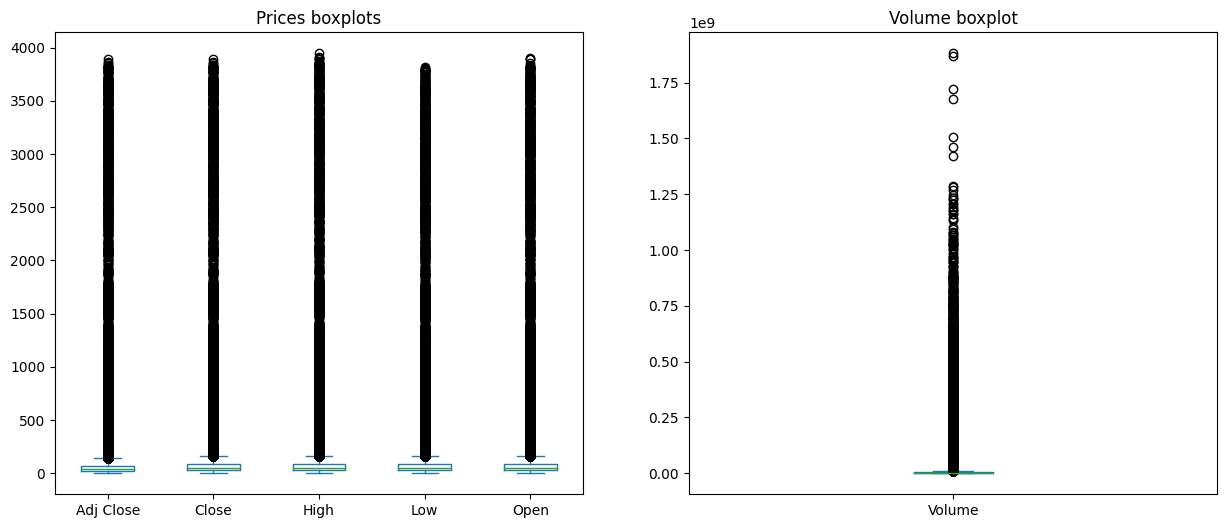

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
data[['Adj Close', 'Close', 'High', 'Low', 'Open']].plot(kind='box', title='Prices boxplots', ax=ax[0]) #print boxplots of numerical values
data['Volume'].plot(kind='box', title='Volume boxplot', ax=ax[1])
plt.show()

In [26]:
outliers_count = {}
columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
for column in columns:
    Q1 = data[column].quantile(0.25) # calculate first quantile
    Q3 = data[column].quantile(0.75) # calculate second quantile
    IQR = Q3 - Q1 # calculate IQR
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count[column] = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum() # sum all outliers depending on lower and upper bound

print("Number of outliers for each column:")
for i in outliers_count.keys():
    print(f'{i}: {outliers_count[i]}')

Number of outliers for each column:
Adj Close: 36041
Close: 36714
High: 36724
Low: 36703
Open: 36715
Volume: 54354


In the graphs above that visualise box-plots we can see that there are a lot of outliers, around 36000 for stock prices and 54000 for volume. For us to see feature distribution on hitograms we will plot data without outliers.

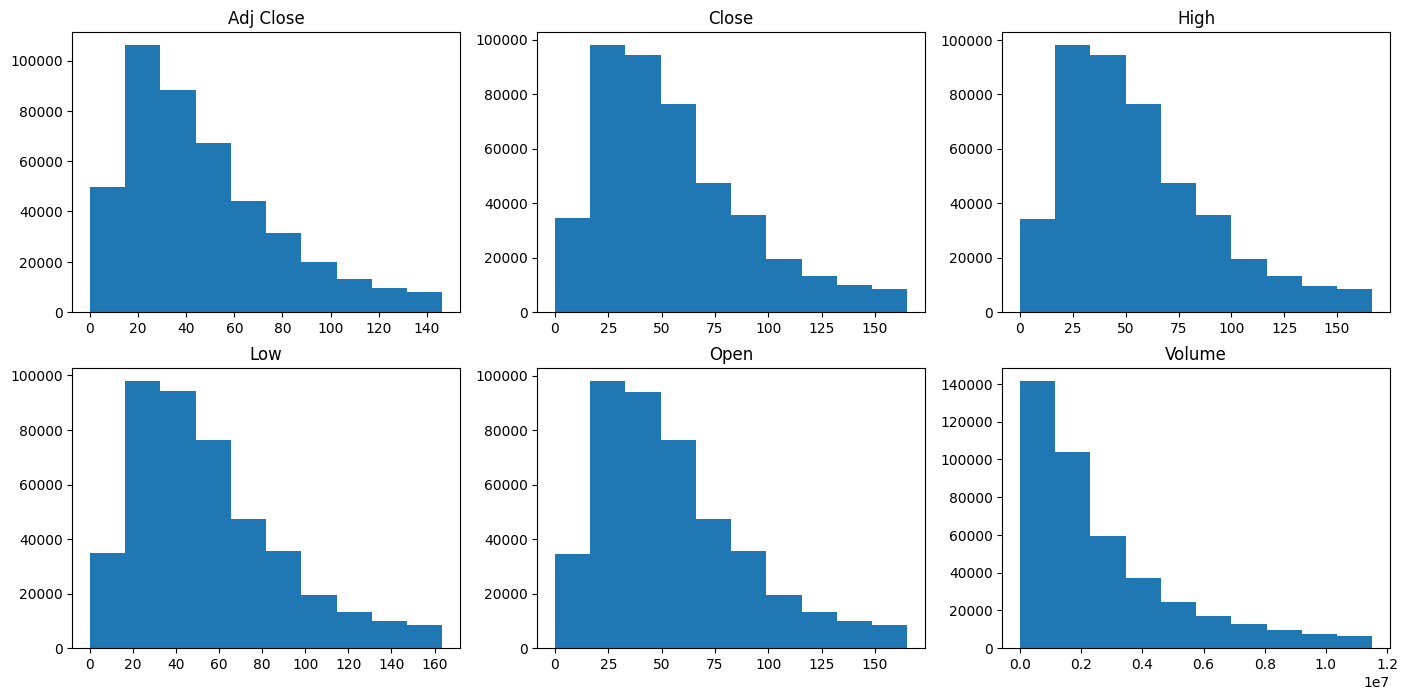

In [27]:
fig, ax = plt.subplots(2, 3, figsize=(17, 8))
for i, j in enumerate(columns):
    k = i // 3
    l = i % 3

    Q1 = data[j].quantile(0.25) # calculate quantiles
    Q3 = data[j].quantile(0.75)
    IQR = Q3 - Q1

    ax[k, l].hist(data[j], range=(0, Q3 + 1.5 * IQR)) # plot from 0 to upper bound
    ax[k, l].set_title(j)
plt.show()

All features have positively skewed distribution.

# Visualizations 

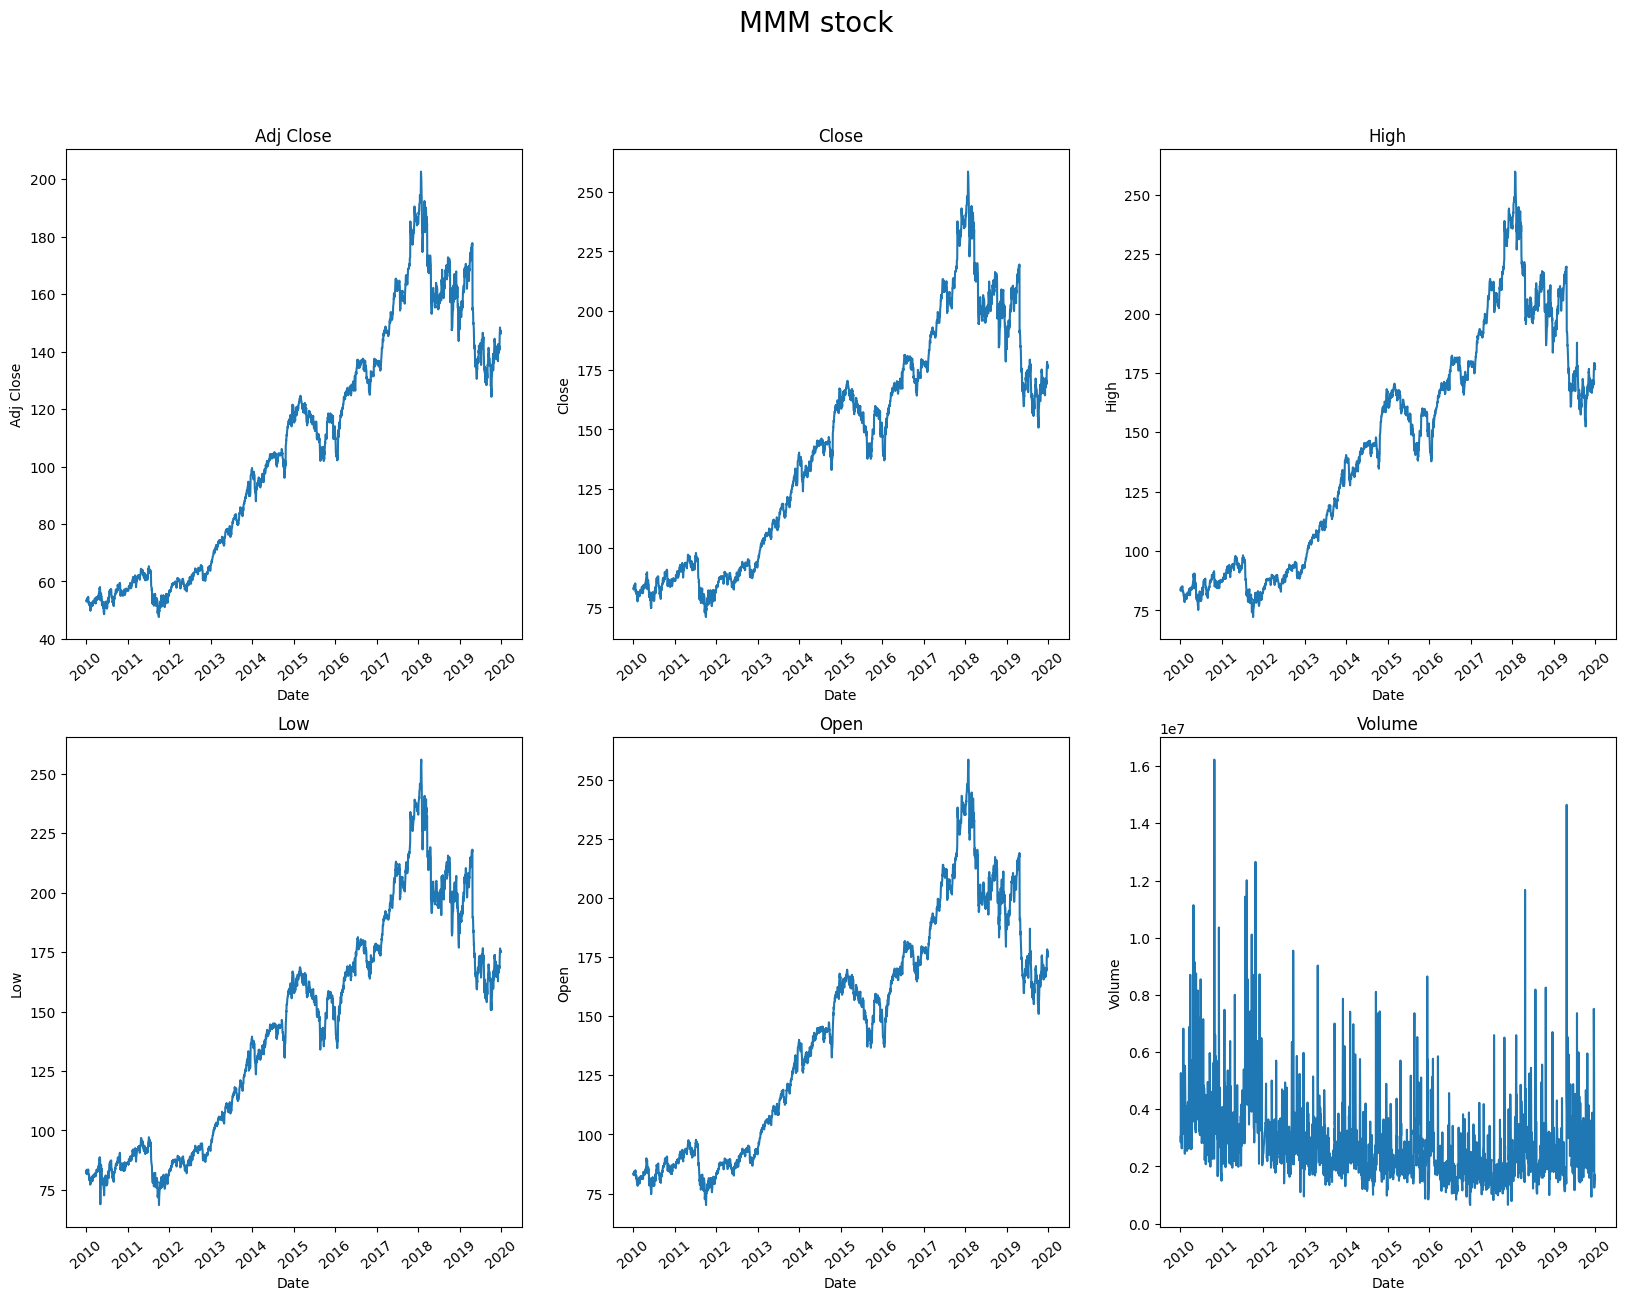

In [45]:
data_mmm = data[data['Symbol'] == 'MMM']

fig, ax = plt.subplots(2, 3, figsize=(20,14))
for i, j in enumerate(columns): # ploting numerical features
    k = i // 3
    l = i % 3
    
    ax[k, l].plot((data_mmm['Date']), data_mmm[j])
    ax[k, l].title.set_text(j)
    ax[k, l].tick_params(axis='x', rotation=40)
    ax[k, l].set_xlabel('Date')
    ax[k, l].set_ylabel(j)

fig.suptitle('MMM stock', fontsize=20)
plt.show()

On the graphs above are visualized all numerical fetures for 'MMM' stock. We will also plot them on the same graph but without 'Volume' variable because it's values are higher.

In [29]:
def plot_graphs(data, symbol): # plot almost all numerical fetures on one graph
    columns = ['Adj Close', 'Close', 'High', 'Low', 'Open']
    for column in columns:
        plt.plot(data['Date'], data[column], label=column)
    plt.tick_params(axis='x', rotation=40)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.title(f'Stock {symbol}')
    plt.show()

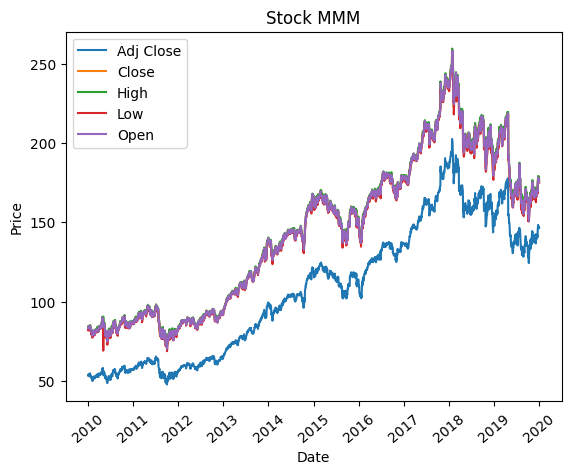

In [30]:
plot_graphs(data[data['Symbol'] == 'MMM'], 'MMM')

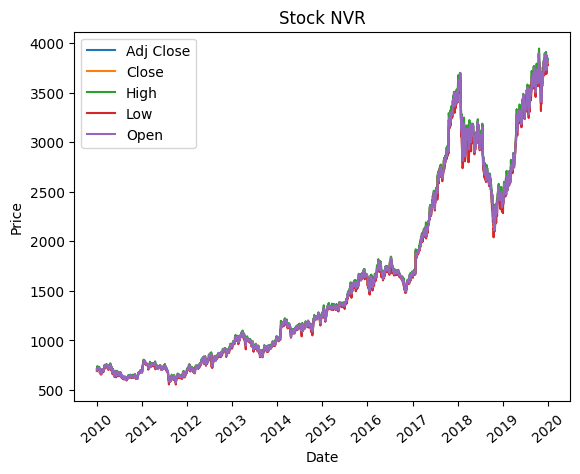

In [31]:
max_row = data.loc[data['Close'].idxmax()]
max_stock = max_row['Symbol']
plot_graphs(data[data['Symbol'] == max_stock], max_stock)

Here we can see graph which visualises the stock that reaches the highest value in variable 'Close' in the while dataset.

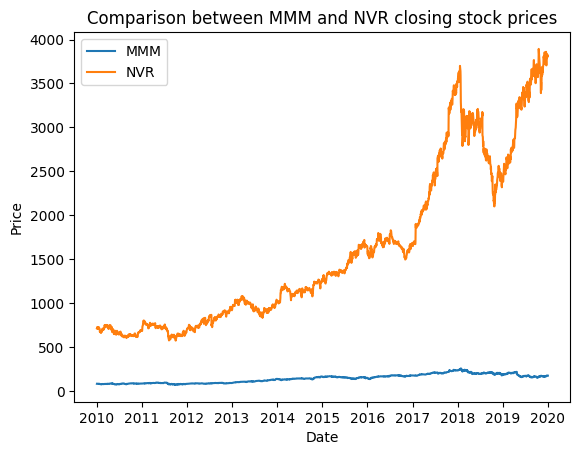

In [32]:
data1 = data[data['Symbol'] == 'MMM']
data2 = data[data['Symbol'] == max_stock]

plt.plot(data1['Date'], data1['Close'], label='MMM')
plt.plot(data2['Date'], data2['Close'], label=max_stock)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title(f'Comparison between MMM and {max_stock} closing stock prices')
plt.show()

On this graph we can see the difference between 'MMM' and 'NVR' stock prices at closing.

# What is the best stock to buy on 15.4.2017.?

In [121]:
def predict_best_stock(data):
    returns = data.groupby('Symbol', group_keys=True)['Adj Close'].apply(lambda x: x.pct_change() + 1) # calculate fractional change between rows
    returns.fillna(1, inplace=True) # fill NaN values that have no prior element with 1, it means there was no change
    cumulative = returns.groupby('Symbol').prod() - 1 # calculate cumulative chang for each stock

    print(f'Best stock to buy: {cumulative.idxmax()}')
    print(f'Return of entire stock: {cumulative.max():.2f}')

Here we write a function that calculates the best stock to buy in a certain time period using .pct_change(), which calculates fractional change between the current and a prior element.

In [122]:
data['Date'] = pd.to_datetime(data['Date'])

print('Based on all data up until 15.4.2017.')
predict_best_stock(data[data['Date'] < pd.to_datetime('2017-04-15')].copy())

Based on all data up until 15.4.2017.
Best stock to buy: DPZ
Return of entire stock: 21.79


In [46]:
print('Based on all data from 30 days before 15.4.2017.')
predict_best_stock(data[(data['Date'] < pd.to_datetime('2017-04-15')) & (data['Date'] > pd.to_datetime('2017-03-15'))].copy())

Based on all data from 30 days before 15.4.2017.
Best stock to buy: VRTX
Return of entire stock: 0.23


In [50]:
print('Based on all data from 90 days before 15.4.2017.')
predict_best_stock(data[(data['Date'] < pd.to_datetime('2017-04-15')) & (data['Date'] > pd.to_datetime('2017-01-15'))].copy())

Based on all data from 90 days before 15.4.2017.
Best stock to buy: ANET
Return of entire stock: 0.49


In [48]:
data_for_day = data[(data['Date'] == pd.to_datetime('2017-04-13'))]
row = data_for_day.loc[data_for_day['Adj Close'].idxmax()]
best_symbol = row['Symbol']
print('Based on data on 13.4.2017.')
print(f'Best stock to buy: {best_symbol}')

Based on data on 13.4.2017.
Best stock to buy: NVR


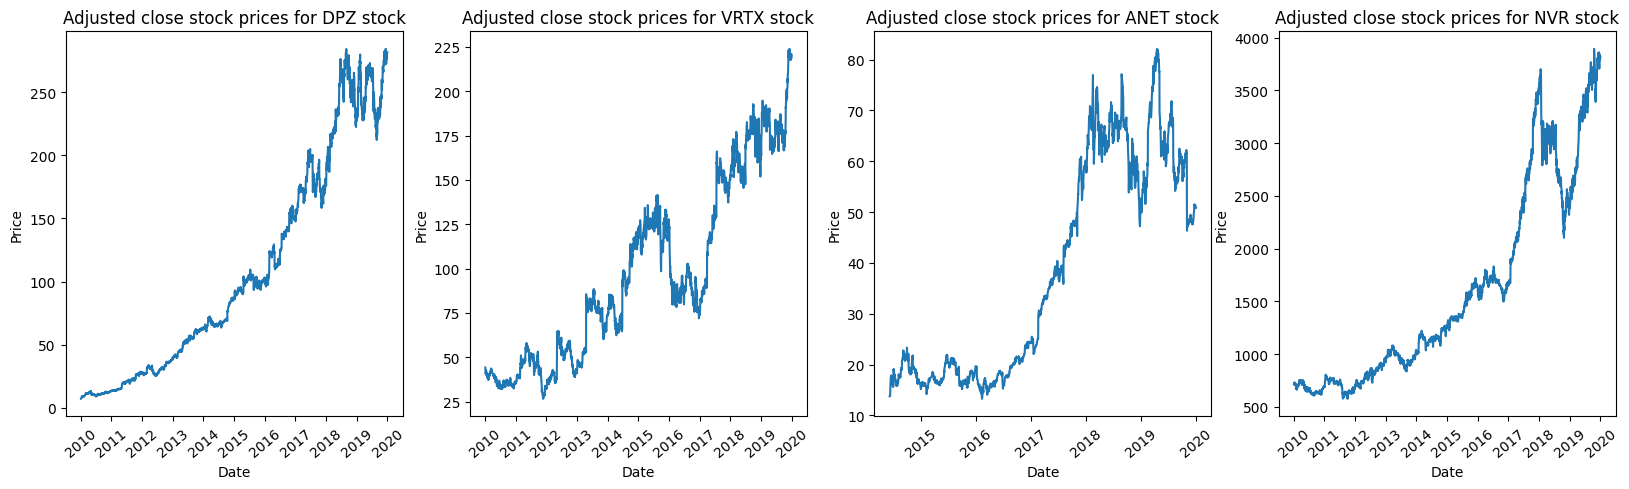

In [55]:
best_stocks_symbols = ['DPZ', 'VRTX', 'ANET', 'NVR']

fig, ax = plt.subplots(1, 4, figsize=(20,5))

for i, j in enumerate(best_stocks_symbols):
    d1 = data[data['Symbol'] == j]

    ax[i].plot(d1['Date'], d1['Adj Close'])
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Price')
    ax[i].set_title(f'Adjusted close stock prices for {j} stock')
    ax[i].tick_params(axis='x', rotation=40)
plt.show()

We got different prediction for different time periods. On the graphs above we can see the increase in prices over time period for each of the four stocks. Based on the graphs the best stocks to invest in are 'DPZ' and 'NVR'. Becasue they have the highest prices and the stediest growth.

# Baseline model

In [73]:
X = data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].copy() # get numerical values
y = data['Target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # split dataset for training and testing

X_to_predict = test_data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].copy() # get values form test.csv

In [74]:
classifier = HistGradientBoostingClassifier().fit(X_train, y_train) # using this model because it accepts NaN values
y_pred = classifier.predict(X_test) # after fitting, predict

In [88]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy score: 0.7949378104942525
F1 score: 0.8781547610497435


Here we split our dataset on training and testing sets. We fit the model and then make predictions and we get accuracy of around 79% and F1 score of around 87%. After that we make predictions on test set and write it into submissions dataframe.

In [82]:
predicted_values = classifier.predict(X_to_predict)

In [83]:
submission = test_data.loc[:,test_data.columns.isin(('Id', ))].copy()
submission.loc[:,'Target'] = predicted_values
submission.head()

,Id,Target
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
